In [1]:
!pip install pandas
!pip install numpy

# Importamos las bibliotecas necesarias para cargar el twwwts.csv
import numpy as np
import pandas as pd

In [2]:
# Levantamos los datasets que necesitamos

# Archivo: tweets_graph.csv
current_directory = !pwd
path = current_directory[0] + '/tweets_graph.csv'
df_tweets = pd.read_csv(path, sep=',', names=['tweet_id','user_id','text','is_reply', 'is_retweet', 'is_original', 'mentions', 'media', 'hashtags', 'favorites', 'retweets'],header=0)

df_tweets

,tweet_id,user_id,text,is_reply,is_retweet,is_original,mentions,media,hashtags,favorites,retweets
0,900823742401699842,334537201,"RT @TwitchyTeam: Wait, WHAT!? Time Mag wants y...",0,7,False,True,False,1,0,0
1,902378409384431616,334537201,RT @MarkSimoneNY: Scientist Shuts Down CNN Hos...,0,219,False,True,False,1,0,0
2,897841296580235264,334537201,RT @MarkSimoneNY: Watch Donald Trump Disavowin...,0,189,False,True,False,1,0,0
3,897841383658205185,334537201,RT @MarkSimoneNY: White Supremacists actually ...,0,424,False,True,False,1,0,0
4,897840931365408768,334537201,RT @MarkSimoneNY: Now the Left Wing PC Nutjobs...,0,185,False,True,False,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
283034,874951925040427008,15513604,".@newtgingrich: To understand President Trump,...",1140,290,False,False,True,1,1,0
283035,719547177597411328,401603103,I Think Governor @SarahPalinUSA U need 2 do a...,2,3,False,False,True,1,1,0
283036,719627815897804800,401603103,@TexasEHS @CoolChange80 @SarahPalinUSA Nope wr...,1,1,True,False,False,3,0,0
283037,719882925567643648,401603103,@1sfreedom @CoolChange80 @TexasEHS @SarahPalin...,0,0,True,False,False,4,0,0


In [3]:
#Archivo: to_predict.csv

path = current_directory[0] + '/to_predict.csv'
df_predict = pd.read_csv(path, sep=',', names=['origin','destiny'],header=0)

df_predict

,origin,destiny
0,34116023,61664932
1,1340093874,789365196
2,464239813,56572080
3,92370600,16297707
4,17824471,31437431
...,...,...
1326036,16439471,20800328
1326037,3819931,259860510
1326038,18650137,104601364
1326039,795680612,22307765


In [6]:
#Archivo: ground_truth.csv

path = current_directory[0] + '/ground_truth.csv'
df_ground_truth = pd.read_csv(path, sep=',', names=['origin','destiny','exists'],header=0)

df_ground_truth

,origin,destiny,exists
0,34116023,61664932,0
1,1340093874,789365196,0
2,464239813,56572080,0
3,92370600,16297707,0
4,17824471,31437431,0
...,...,...,...
1326036,16439471,20800328,0
1326037,3819931,259860510,0
1326038,18650137,104601364,0
1326039,795680612,22307765,0


In [13]:
'''
Ahora cargo el grafo usando las librerias provistas por la catedra
'''
!pip install bson

  Created wheel for bson: filename=bson-0.5.10-py3-none-any.whl size=11978 sha256=5a74afd4f3d45aa8ebbdc6b13a4b2ad332af62ff4d037abfd630d51aad7d04f2
  Stored in directory: /home/dana/.cache/pip/wheels/92/1b/66/5a288fdf87a97b2f7e2cbdc387a431e60ed298b11003692055
Successfully built bson


In [7]:
#Instalo las libreria y las importo
!pip install networkx
!pip install pickle5

import networkx as nx
import pickle5 as pickle

     |████████████████████████████████| 2.0 MB 1.7 MB/s eta 0:00:01
     |████████████████████████████████| 132 kB 1.3 MB/s eta 0:00:01
  Created wheel for pickle5: filename=pickle5-0.0.11-cp38-cp38-linux_x86_64.whl size=262063 sha256=4be7104c89d1612f54ba96146a4836236ac02650a3173cb19a0dd1cff6640266
  Stored in directory: /home/dana/.cache/pip/wheels/25/d4/61/dbd8edd1a0d656be7b4267c85db3b61951eb60016a0154a122
Successfully built pickle5


In [16]:
!pip install pymongo

     |████████████████████████████████| 498 kB 1.0 MB/s eta 0:00:01


In [17]:
datapath = current_directory[0] + '/graph_tp.gpickle'
print(datapath)
file = open(datapath,'rb')


graph = pickle.load(file)
file.close()

graph.number_of_nodes(),graph.number_of_edges()

/home/dana/Desktop/projects/link-prediction/graph_tp.gpickle


(2846, 59142)

In [8]:
!pip install matplotlib

import matplotlib.pyplot as plt

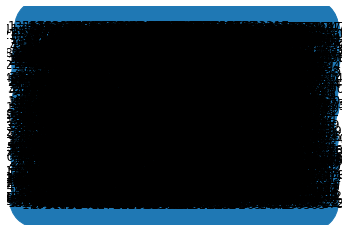

In [21]:
limits = plt.axis("off")
pos = nx.random_layout(graph) 
nx.draw_networkx(graph, pos=pos, node_size = graph.number_of_nodes())